In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [62]:
df1= pd.read_excel(r"C:\Users\MY\Algerian_fire1.xlsx")

In [63]:
df1.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [64]:
df1['Classes  '].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', nan, 'not fire    '], dtype=object)

### we have change class feature 1 for fire and 0 for the not fire

In [65]:
lis1 = ['fire   ','fire']
lis2 = ['not fire   ','not fire     ','not fire    ','not fire','not fire ']
for element in range(len(df1['Classes  '])):
    if df1['Classes  '][element] in lis1:
        df1['Classes  '][element]=1
    elif df1['Classes  '][element] in lis2:
        df1['Classes  '][element]=0
    else :
        df1['Classes  '][element]= 1

In [66]:
df1['Classes  '].value_counts()

1    138
0    106
Name: Classes  , dtype: int64

In [67]:
#### we have two region in which 0 represent Bejaia region and 1 represent Sidi Bel-abbes region 
df1["region"] = df1['Classes  ']


In [68]:
for entry in range(len(df1["region"])):
    if entry<=121:
        df1["region"][entry] = 0
    else :
        df1["region"][entry] = 1

In [69]:
df1["region"].value_counts()

0    122
1    122
Name: region, dtype: int64

#### check for missing values

In [70]:
df1.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
region         0
dtype: int64

In [73]:
df1.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'region'],
      dtype='object')

In [74]:
df1['Classes  '] = df1['Classes  '].astype(int)

In [75]:
df1['region'] = df1["region"].astype(int)

In [78]:
#### check the data type
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      244 non-null    int32  
 14  region       244 non-null    int32  
dtypes: float64(5), int32(2), int64(6), object(2)
memory usage: 26.8+ KB


In [79]:
df1['FWI'].unique()
### there is one record is fire which is replace by the moode of the columnn

array(['0.5', '0.4', '0.1', '0', '2.5', '7.2', '7.1', '0.3', '0.9', '5.6',
       '0.2', '1.4', '2.2', '2.3', '3.8', '7.5', '8.4', '10.6', '15',
       '13.9', '3.9', '12.9', '1.7', '4.9', '6.8', '3.2', '8', '0.6',
       '3.4', '0.8', '3.6', '6', '10.9', '4', '8.8', '2.8', '2.1', '1.3',
       '7.3', '15.3', '11.3', '11.9', '10.7', '15.7', '6.1', '2.6', '9.9',
       '11.6', '12.1', '4.2', '10.2', '6.3', '14.6', '16.1', '17.2',
       '16.8', '18.4', '20.4', '22.3', '20.9', '20.3', '13.7', '13.2',
       '19.9', '30.2', '5.9', '7.7', '9.7', '8.3', '0.7', '4.1', '1',
       '3.1', '1.9', '10', '16.7', '1.2', '5.3', '6.7', '9.5', '12',
       '6.4', '5.2', '3', '9.6', '4.7', 'fire   ', '14.1', '9.1', '13',
       '17.3', '30', '25.4', '16.3', '9', '14.5', '13.5', '19.5', '12.6',
       '12.7', '21.6', '18.8', '10.5', '5.5', '14.8', '24', '26.3',
       '12.2', '18.1', '24.5', '26.9', '31.1', '30.3', '26.1', '16',
       '19.4', '2.7', '3.7', '10.3', '5.7', '9.8', '19.3', '17.5', '15.4',

In [82]:
df1['FWI'].mode()[0]


'0.4'

In [85]:
df1[df1['FWI']=='fire   ']
### this fire record at the 165 index so we have to change it with the mode of the data
df1['FWI'][165] = "0.4"

In [86]:
#### we are converting this fwi column form object to the float
df1['FWI'] = df1['FWI'].astype(float)

In [90]:
df1[df1["DC"]=='14.6 9'].index

Int64Index([165], dtype='int64')

In [91]:
df1["DC"][165] = "14.69"

In [92]:
### change DC column from objective to the float
df1["DC"] = df1["DC"].astype(float)

In [93]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    int32  
 14  region       244 non-null    int32  
dtypes: float64(7), int32(2), int64(6)
memory usage: 26.8 KB


#### we have all the feature are numerical type

##### we want to check the correlation of the 

In [96]:
df2 = df1.drop(columns=["year"])

In [97]:
df2.corr()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
day,1.000000e+00,2.232788e-17,0.095772,-0.074209,0.047001,-0.112265,0.224032,0.491571,0.527930,0.177727,0.517229,0.350909,0.201784,4.662229e-16
month,2.232788e-17,1.000000e+00,-0.059017,-0.037884,-0.041447,0.035322,0.015577,0.068178,0.127669,0.061680,0.085822,0.084119,0.022333,-9.586232e-17
Temperature,9.577222e-02,-5.901677e-02,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370511,0.607551,0.455504,0.558800,0.518119,2.734961e-01
RH,-7.420934e-02,-3.788419e-02,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220344,-0.690637,-0.348587,-0.570483,-0.435023,-4.064239e-01
Ws,4.700086e-02,-4.144673e-02,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076253,0.015248,0.029756,0.029001,-0.066529,-1.768290e-01
Rain,-1.122654e-01,3.532207e-02,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296808,-0.347105,-0.299171,-0.322810,-0.379449,-4.108006e-02
FFMC,2.240321e-01,1.557668e-02,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503919,0.739730,0.589652,0.686342,0.770114,2.246798e-01
DMC,4.915710e-01,6.817778e-02,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875362,0.674499,0.982073,0.874924,0.584188,1.910937e-01
DC,5.279300e-01,1.276691e-01,0.370511,-0.220344,0.076253,-0.296808,0.503919,0.875362,1.000000,0.498926,0.941906,0.740175,0.507132,-8.148217e-02
ISI,1.777266e-01,6.168011e-02,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.498926,1.000000,0.635891,0.908054,0.735511,2.684206e-01


<AxesSubplot:>

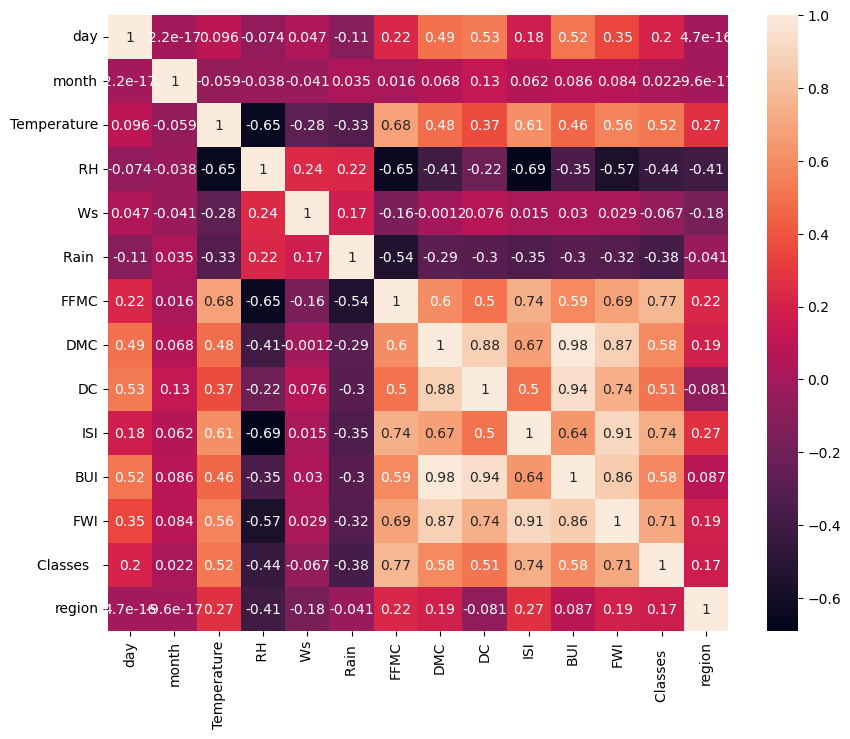

In [99]:
### using heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df2.corr(),annot = True)

#### BUI and Dmc column are 98% are correlated so we can drop any one of this feature
#### BUI and Dc are 94% correlated


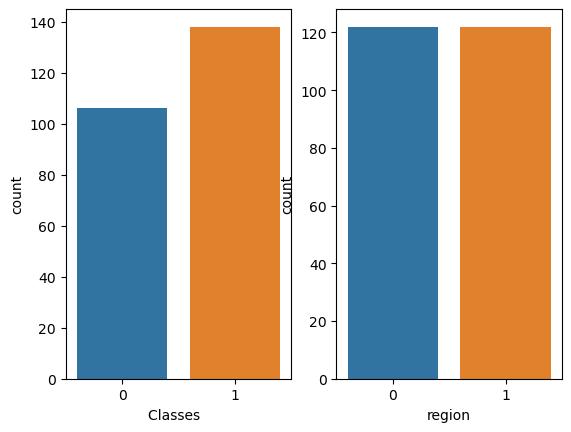

In [121]:
cat_feature = ['Classes  ', 'region']
for i in range(len(cat_feature)):
    plt.subplot(1,2,i+1)
    sns.countplot(x= cat_feature[i],data = df2)
    plt.xlabel(xlabel=cat_feature[i])

<AxesSubplot:xlabel='BUI', ylabel='DMC'>

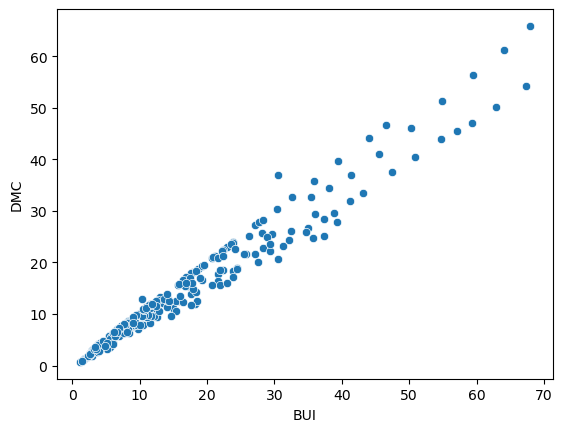

In [101]:
sns.scatterplot(x ='BUI',y ='DMC' ,data = df1)

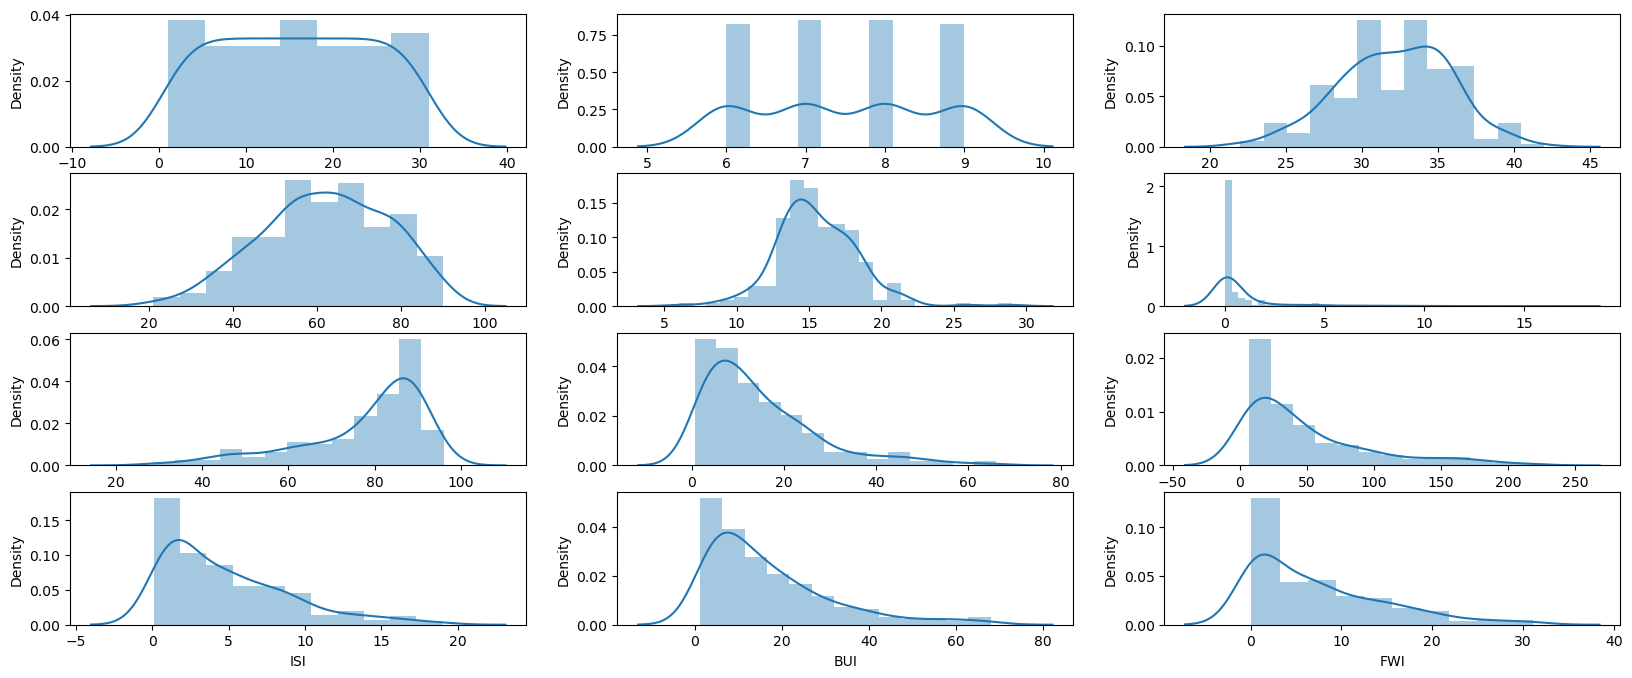

In [132]:
### check the variaton of the feature 
fig = plt.figure(figsize=(20,10))
for i in range(12):
    plt.subplot(5,3,i+1)
    sns.distplot(df2[df2.columns[i]])
    
    

#### most of the data has the outliers and the data is right skwed


In [129]:
for i in df2.columns:
    l = df2[df2[i]==0][i].value_counts()
    print(i,l)
### by this we can see that the there is so many zero values which we should to handle   

day Series([], Name: day, dtype: int64)
month Series([], Name: month, dtype: int64)
Temperature Series([], Name: Temperature, dtype: int64)
 RH Series([], Name:  RH, dtype: int64)
 Ws Series([], Name:  Ws, dtype: int64)
Rain  0.0    133
Name: Rain , dtype: int64
FFMC Series([], Name: FFMC, dtype: int64)
DMC Series([], Name: DMC, dtype: int64)
DC Series([], Name: DC, dtype: int64)
ISI 0.0    4
Name: ISI, dtype: int64
BUI Series([], Name: BUI, dtype: int64)
FWI 0.0    9
Name: FWI, dtype: int64
Classes   0    106
Name: Classes  , dtype: int64
region 0    122
Name: region, dtype: int64


we have replaced all the zero value with the mean of the columns


In [130]:
features = ['ISI', 'FWI']
for feature in features:
    df2[feature] = df2[feature].replace(0,df2[feature].mean())
    

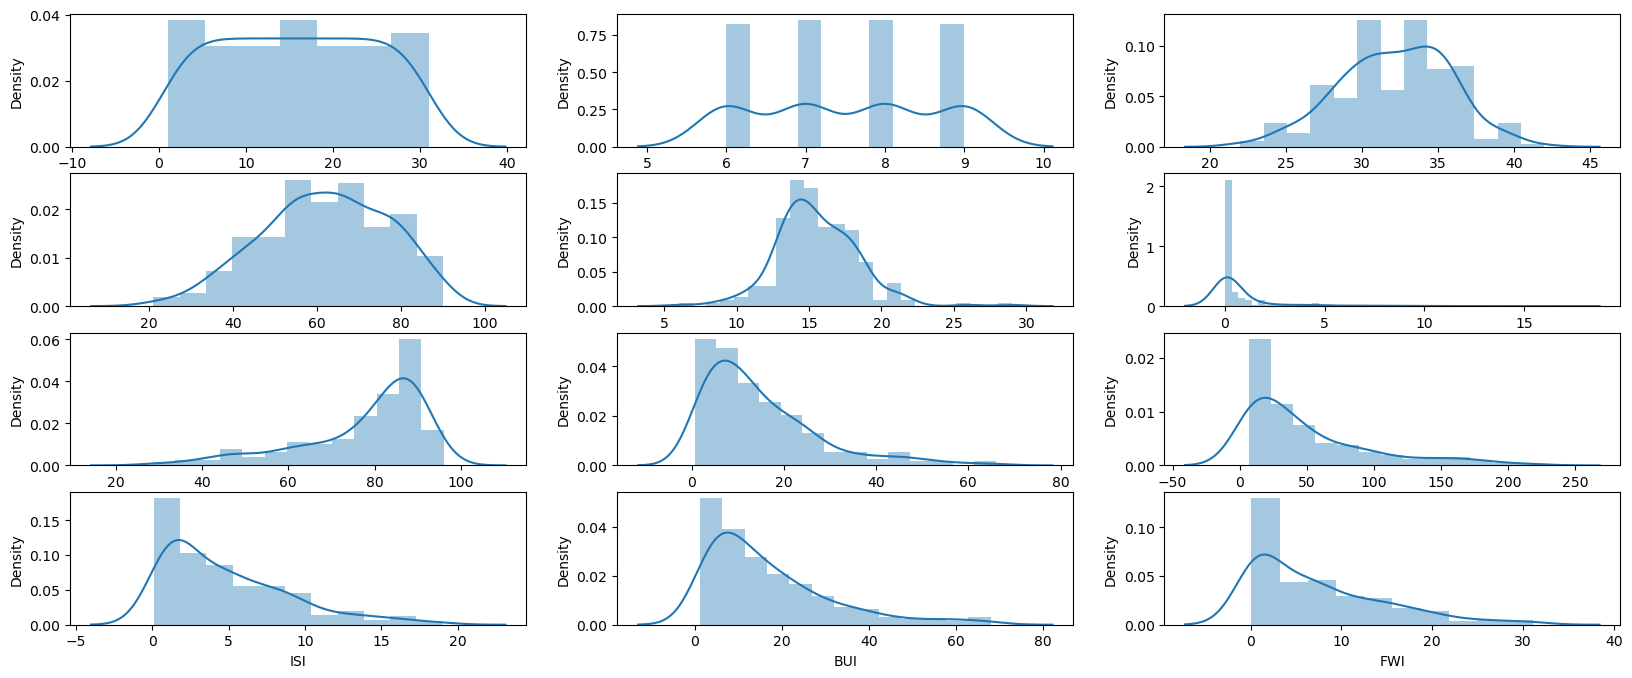

In [133]:
fig = plt.figure(figsize=(20,10))
for i in range(12):
    plt.subplot(5,3,i+1)
    sns.distplot(df2[df2.columns[i]])

#### check for the outliers

<AxesSubplot:>

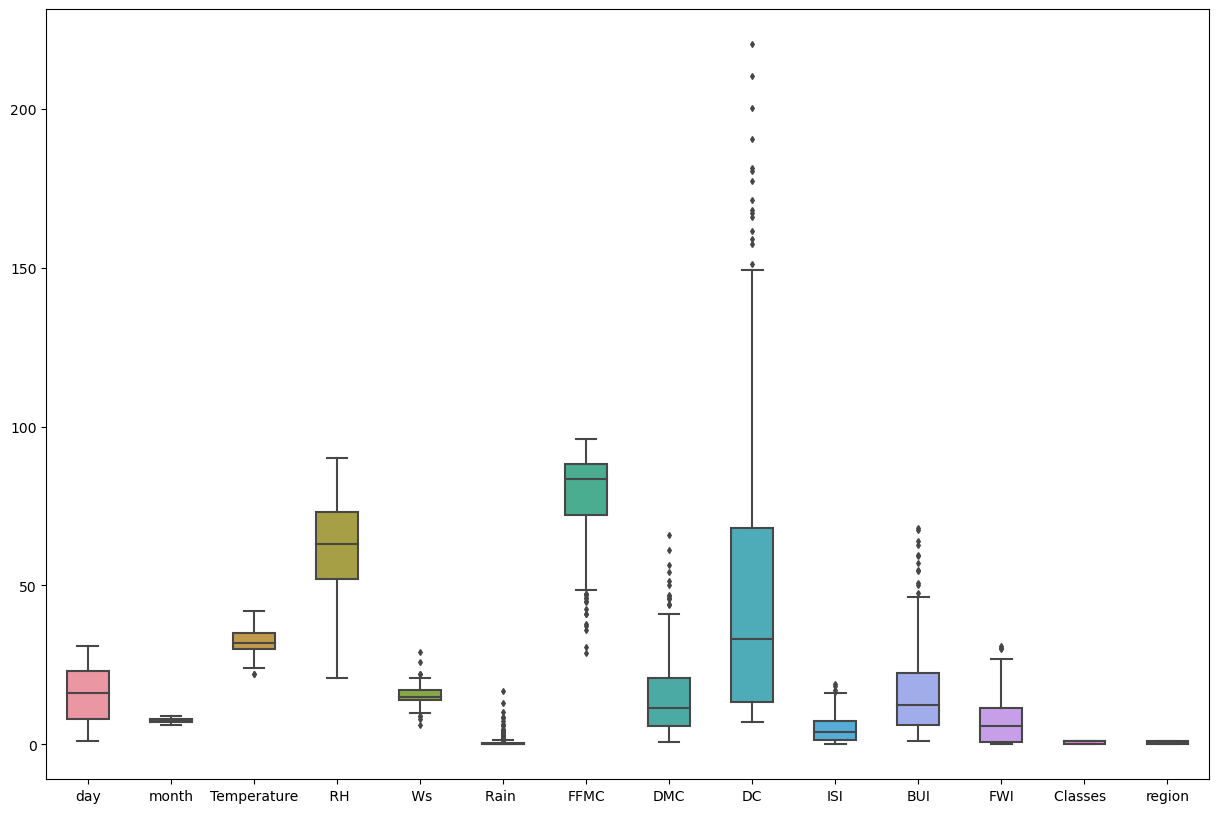

In [134]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df2, width= 0.5,ax=ax,  fliersize=3)


In [138]:
#### most of the feature has outliers in the right side 
q = df2['DC'].quantile(0.90)
# we are removing the top 10% data from the DC column
df2 = df2[df2["DC"]<q]

In [140]:
#### most of the feature has outliers in the right side 
q = df2['BUI'].quantile(0.95)
# we are removing the top 5% data from the BUI column
df2 = df2[df2["BUI"]<q]

In [ ]:
#### most of the feature has outliers in the right side 
q = df2['DMC'].quantile(0.95)
# we are removing the top 5% data from the DMC column
df2 = df2[df2["DMC"]<q]

In [145]:
#### most of the feature has outliers in the right side 
q = df2['FFMC'].quantile(0.90)
# we are removing the top 10% data from the FFMC column
df2 = df2[df2["FFMC"]<q]

In [150]:
#### most of the feature has outliers in the right side 
q = df2[' Ws'].quantile(0.95)
# we are removing the top 5% data from the Ws column
df2 = df2[df2[' Ws']<q]

<AxesSubplot:>

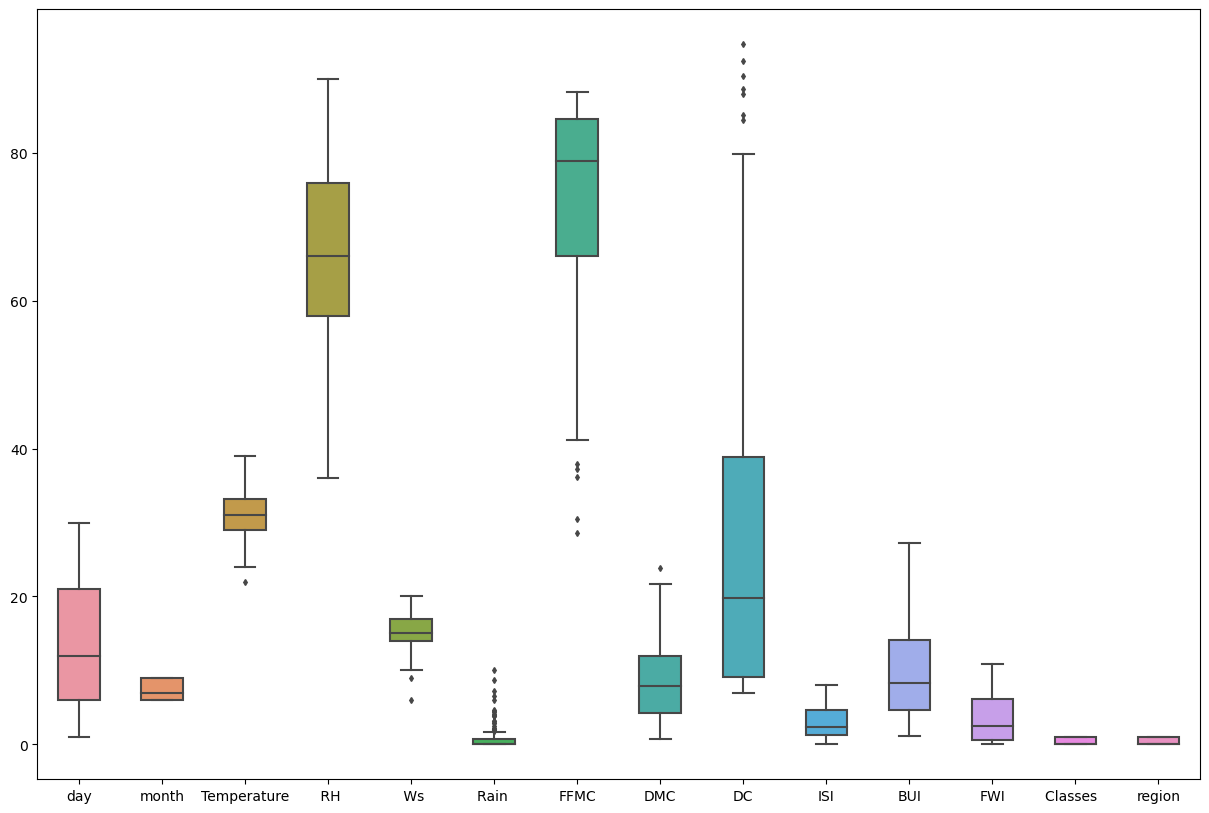

In [151]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df2, width= 0.5,ax=ax,  fliersize=3)

In [149]:
df2.columns

Index(['day', 'month', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC',
       'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'region'],
      dtype='object')

In [155]:
df3 = df2.drop(columns=['day','month','Classes  ','region'])

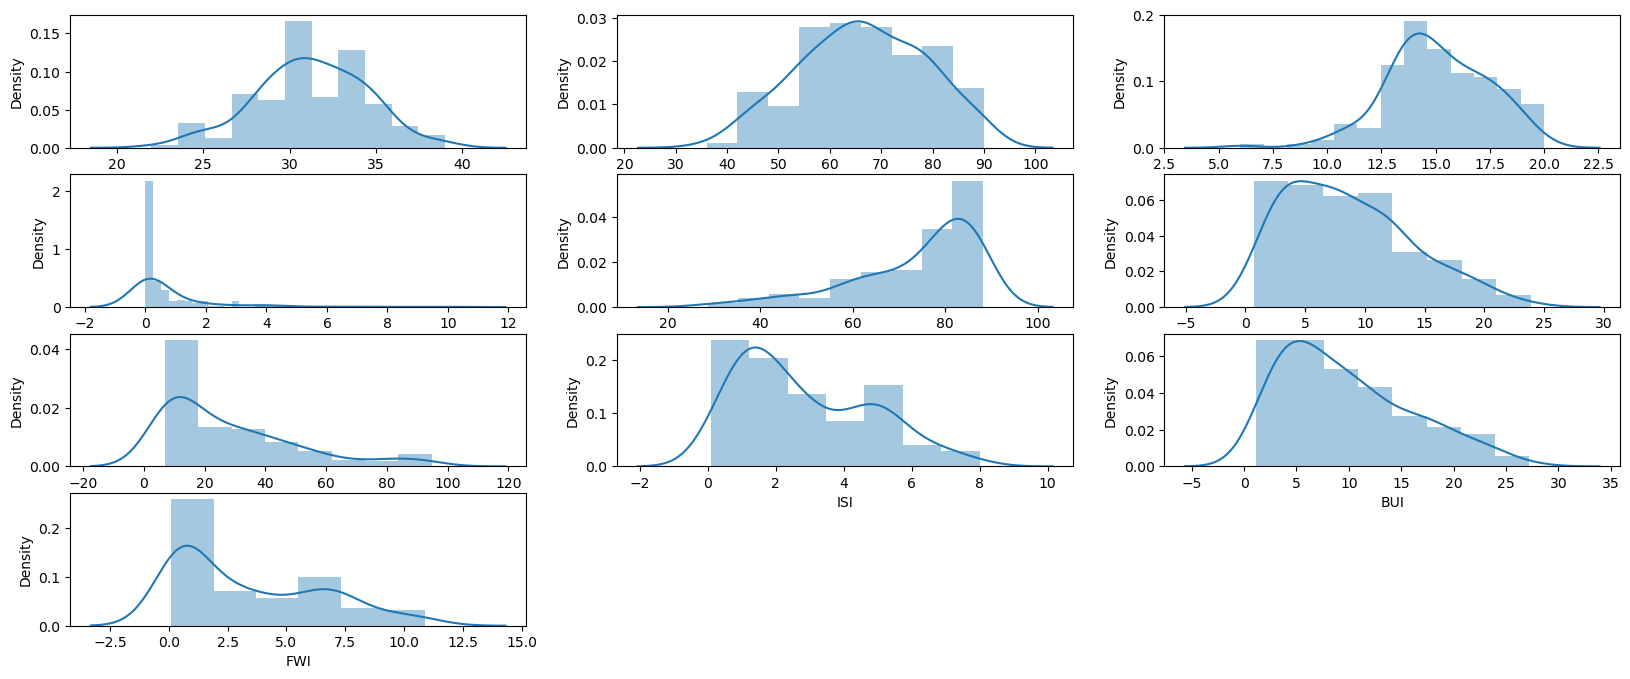

In [173]:
fig = plt.figure(figsize=(20,10))
for i in range(len(df3.columns)):
    plt.subplot(5,3,i+1)
    sns.distplot(df3[df3.columns[i]])

In [175]:
df2.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.30000,3.4,0.500000,0,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.00000,3.9,0.400000,0,0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,4.77418,1.7,7.008197,0,0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.20000,3.9,0.500000,0,0
5,6,6,31,67,14,0.0,82.6,5.8,22.2,3.10000,7.0,2.500000,1,0


In [181]:
df2.columns

Index(['day', 'month', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC',
       'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'region'],
      dtype='object')

In [180]:
df3.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,day,month
0,29,57,18,0.0,65.7,3.4,7.6,1.30000,3.4,0.500000,1,6
1,29,61,13,1.3,64.4,4.1,7.6,1.00000,3.9,0.400000,2,6
3,25,89,13,2.5,28.6,1.3,6.9,4.77418,1.7,7.008197,4,6
4,27,77,16,0.0,64.8,3.0,14.2,1.20000,3.9,0.500000,5,6
5,31,67,14,0.0,82.6,5.8,22.2,3.10000,7.0,2.500000,6,6


In [177]:
df3["day"]=df2["day"]

In [179]:
df3["month"] = df2["month"]

In [182]:
df3["class"] = df2['Classes  ']

In [183]:
df3["region"] = df2["region"]

In [204]:
#### final dataset for model building is 
df3.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,day,month,class,region
238,28,70,15,0.0,79.9,13.8,36.1,2.4,14.1,3.000000,25,9,0,1
239,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.500000,26,9,1,1
240,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,7.008197,27,9,0,1
242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.700000,29,9,0,1
243,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.500000,30,9,0,1


In [185]:
x =df3.drop(columns=["class"])
y = df3["class"]

In [186]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [189]:
from sklearn.linear_model import LogisticRegression

In [187]:
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)

In [188]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size= 0.25, random_state = 355)

In [190]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [208]:
y_pred = log_reg.predict(x_test)

In [209]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9230769230769231

In [210]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[21,  2],
       [ 1, 15]], dtype=int64)

In [211]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [212]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.9130434782608695

In [213]:
##Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.9545454545454546

In [214]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9333333333333332

In [221]:
f2_score = 5*Recall*Precision/((4*Precision)+Recall)
f2_score

0.9459459459459459

In [218]:
import pickle
filename = "fireprediction.pkl"
pickle.dump(log_reg,open(filename,"wb"))


In [219]:
save_model = pickle.load(open(filename,"rb"))